# Mom Therapy Marketing Survey Analysis

This analysis focuses on segmenting the given population and finding which survey responses are most likely to lead to a potential customer conversion. I will aim to find the key characteristics and needs that are most commonly associated with moms who choose to attend therapy. We can then design directed marketing campaigns to target specific segments that are most likely to convert. 

**Survey Data**

The survey was distributed through a variety of channels both in-person and through social media. In total 95 responses were captured. Questions were originally designed for basic analysis with Google's built-in tools, but further insight was needed by the client who had questions such as:

•   Who are my core segments?

•	How do these segments differ in their emotional struggles or needs?
What emotional needs align with which service barriers?

•	Among those reporting burnout, anxiety, or guilt, what are the most common barriers keeping them from therapy (e.g., cost, time, lack of trust)?

Which therapy features are most attractive to which groups?

•	Which groups (by age, stage, or emotional need) are most drawn to features like “therapist who’s also a mom,” “flexible scheduling,” or “practical tools”?

•   What website or social proof elements matter most for conversion?

•	For those saying they’d reach out to a therapist, which website elements (credentials, photos, ease of booking, testimonials) matter most?

•	Are certain emotional struggles (e.g., guilt, burnout) more sensitive to seeing a therapist’s personal style (like “also a mom”) on the website or social media?

•   What marketing strategies can address key barriers?

•	For those citing cost or time as a barrier, would emphasizing flexible options (evening sessions, virtual) increase engagement?

Where should we focus outreach efforts?

•	Which discovery channels (Instagram, Google, referrals, OB/GYN) are most used by those actively seeking therapy?

•	Can you identify distinct customer segments (e.g., younger first-time moms vs. older moms with multiple kids) based on age, motherhood stage, and number of children?

•   How do preferred marketing channels differ across groups? (pie chart, age groups – social media platorm)

•	Do younger moms prefer learning from TikTok or Instagram, while older moms rely more on Google or podcasts?

In order to answer the given questions, some feature engineering/manipulation of the data was needed. 

**Loading the Data:**


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from prince import MCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data, drop email column, and check data
marketingdf = pd.read_csv('MomSurvey.csv', header=None)

# Make a copy of specific columns for keyword analysis later
keyworddf = marketingdf[[1, 2, 3, 8, 10]].copy()

# Drop date column and open-ended response column (saved in keyworddf for later)
marketingdf = marketingdf.drop(columns=[0, 8])

print(marketingdf.head())



        1                                              2  3   \
0  36 - 40  Toddler years (1-3 years);School-age children  3   
1  36 - 40     4-12 months postpartum;School-age children  2   
2  36 - 40                            School-age children  2   
3  31 - 35                            School-age children  2   
4      46+                            School-age children  1   

                                                  4   \
0    Overwhelm or burnout;Anxiety or racing thoughts   
1  Overwhelm or burnout;Anxiety or racing thought...   
2  Anxiety or racing thoughts;Mom guilt or perfec...   
3  Overwhelm or burnout;Anxiety or racing thought...   
4    Overwhelm or burnout;Mom guilt or perfectionism   

                                                  5   \
0  Not sure where to find someone I trust;Childca...   
1  Not enough time;I feel like I should be able t...   
2  Not enough time;Therapy feels too expensive;I ...   
3                             I'm already in therapy  

**Data Cleaning / Feature Engineering / Data Manipulation**

Data straight from the Google survey was fairly messy for my use case. Some cleaning and engineering/manipulation was required.

Columns are unnamed and many columns contain data from multiresponse questions, so those columns hold each selected response separated by a semicolon. In addition to being multiresponse, many of these questions also included an option for an open-ended response. I needed to convert these columns to a usable form, so lists were created for each set of selections in the multiresponse question columns. The 5th column (which was also from a multiresponse question) contained what would be the label for each of our survey responses. This multiresponse question held the option for moms to select that they were already in therapy.

One way these multiresponse question types were expanded for analysis was through expanding and binarizing the labels (creating a column for each response option and making the values 0 if not selected and 1 if selected). This was achieved using Scikit-learn's MultiLabelBinarizer function. For each column that now contained a list of responses, each possible response would now have it's own column and 0/1 indicating whether the option was selected. This was particularly important for extracting the label column. After binarizing the column that contained the response indicating whether that specific mom was already in therapy, the label column was created. 

This function was utilized in two ways: 1.) to extract the label column (In therapy or not) and 2.) to expand and binarize all multiresponse question columns to seach for patterns within all responses. 

Since a majority of questions were multiresponse (with open-ended option), binarizing resulted in a very high dimensional data structure with over 200 columns. More than double the amount of data points captured in the survey. To eliminate the one-off responses, a count threshold was applied to all columns. Columns that did not meet a certain number of positive responses (represented by 1's in the column) were dropped. 

In [3]:
# Create lists out of multi-response question columns
for col in marketingdf.columns:
    if marketingdf[col].str.contains(';').any():
        marketingdf[str(col) + '_list'] = marketingdf[col].str.split(';')
        marketingdf = marketingdf.drop(columns=col)
    # print(col)

# Make a copy before binarizing multiresponse question columns
marketingdf2 = marketingdf.copy()

bina = MultiLabelBinarizer()
for col in marketingdf.columns:
    try:
        if col.endswith('_list'):
            hotenc = pd.DataFrame(bina.fit_transform(marketingdf[col]),
                                    columns=[f"{col}_{cls}" for cls in bina.classes_],
                                    index=marketingdf.index)
            marketingdf.drop(columns=col, inplace=True)
            marketingdf = pd.concat([marketingdf, hotenc], axis=1)
    except:
        pass

label = marketingdf['5_list_I\'m already in therapy']
print(f"Label column (in therapy or not): \n {label} \n")

Label column (in therapy or not): 
 0     0
1     0
2     0
3     1
4     0
     ..
90    0
91    0
92    0
93    0
94    0
Name: 5_list_I'm already in therapy, Length: 95, dtype: int64 



**Analysis of Sources of Information by Group**

While at this step questions regarding social media use and sources of information were examined for each age group of the respondent. For the first analysis, all answer choices (minus the open-ended ones) were included in the pie chart, but then some categories that were less relevant to marketing importance were filtered out. 

Use of each information source was also examined among those who were in therapy already to see if there was a leading source of information among converts. 

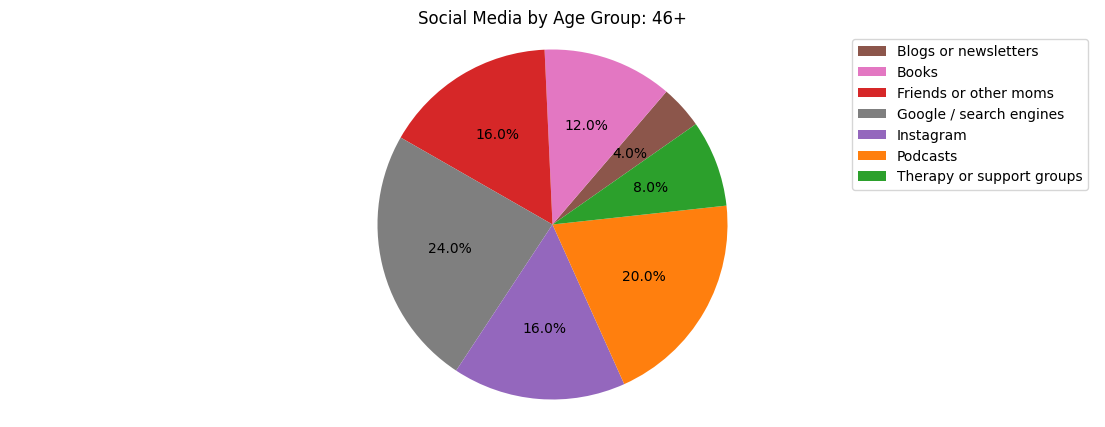

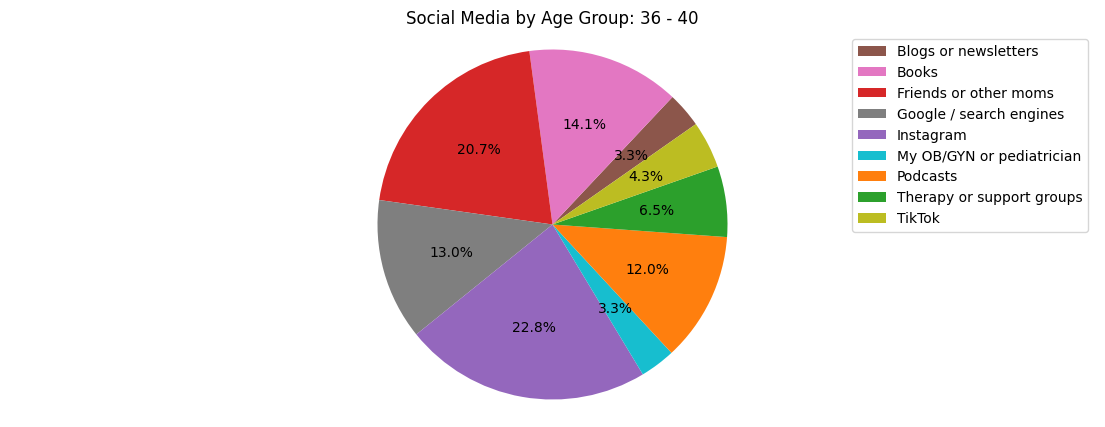

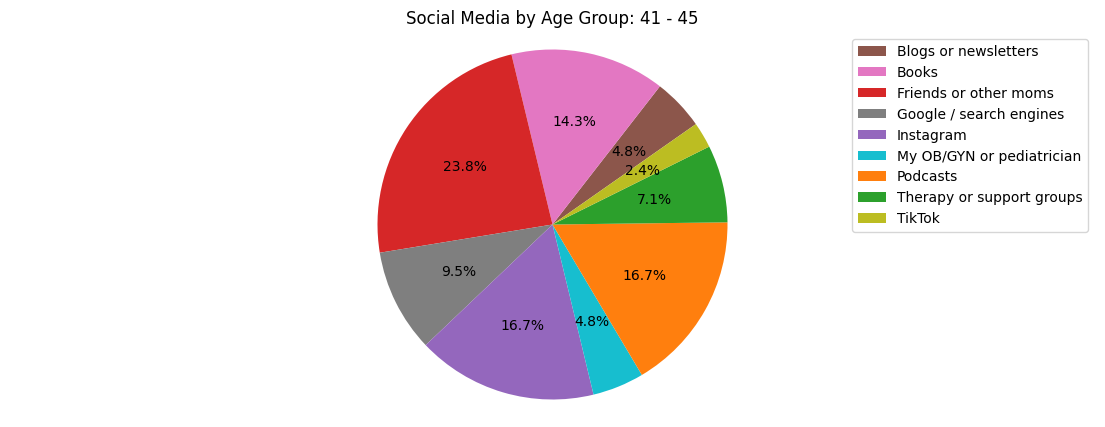

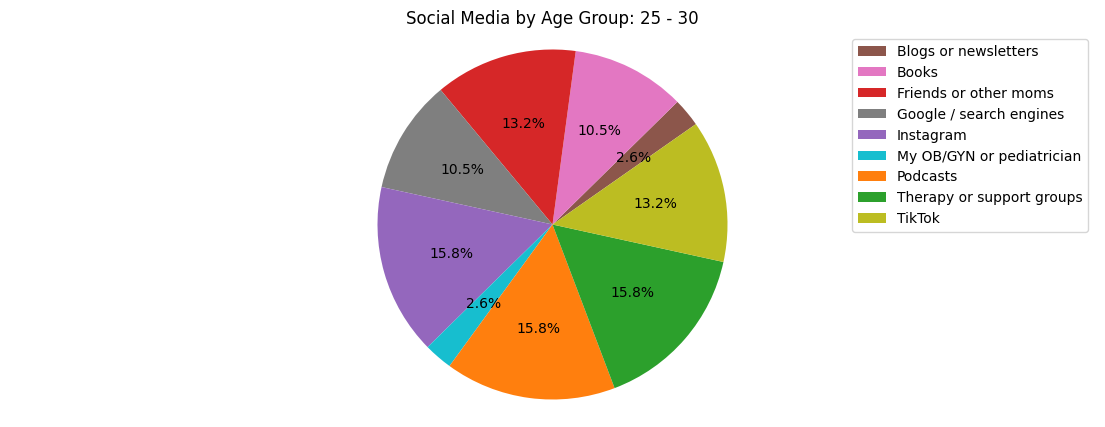

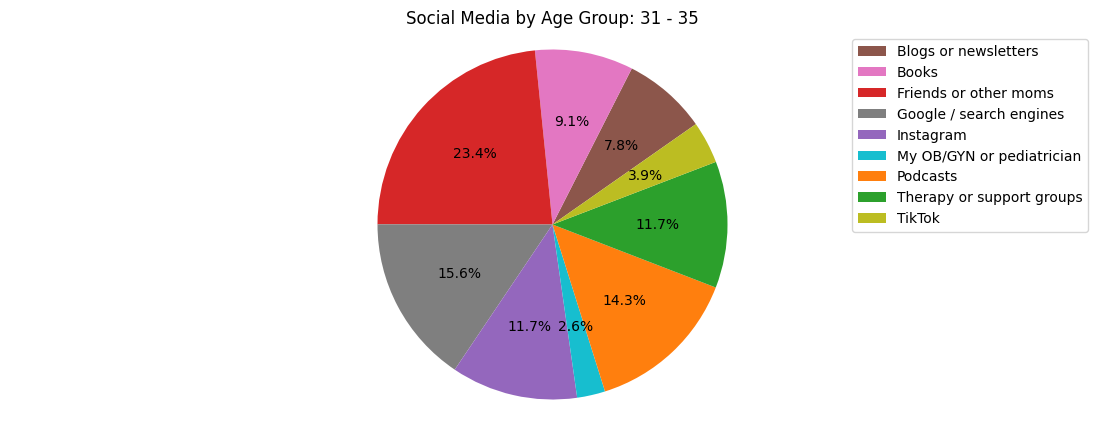

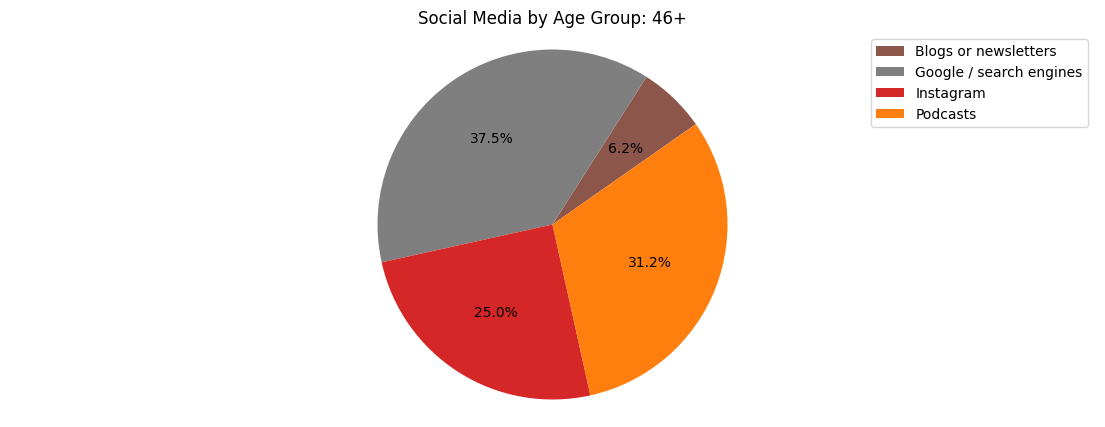

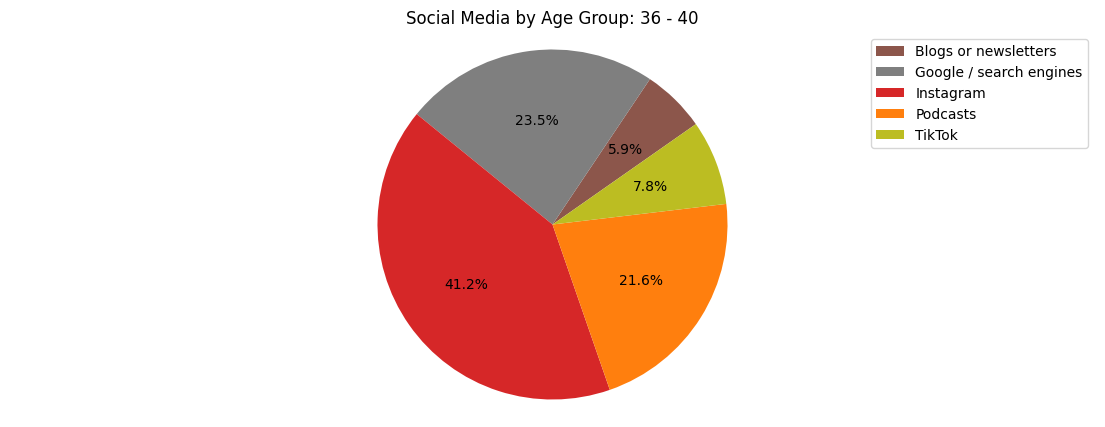

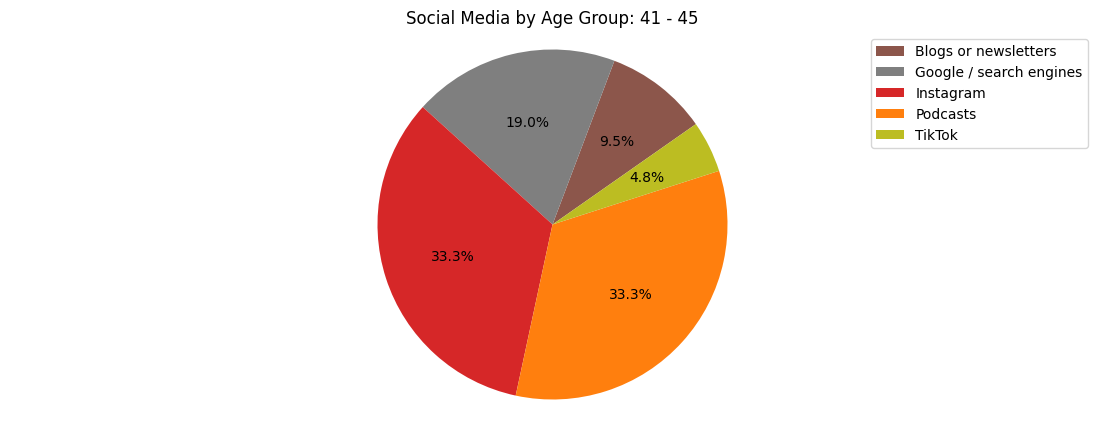

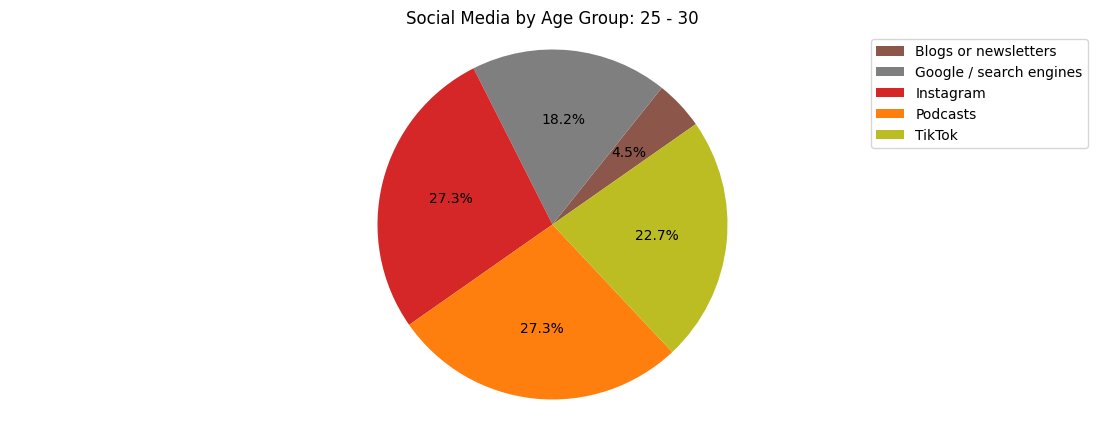

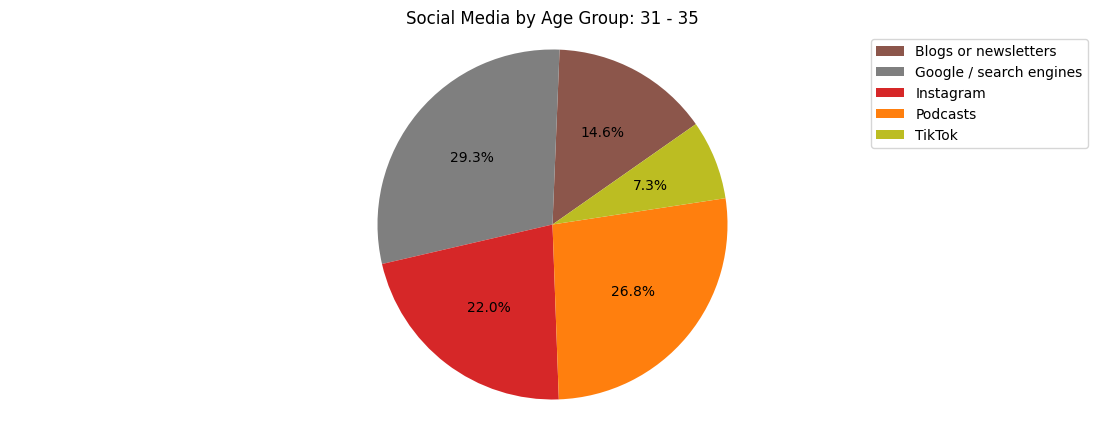

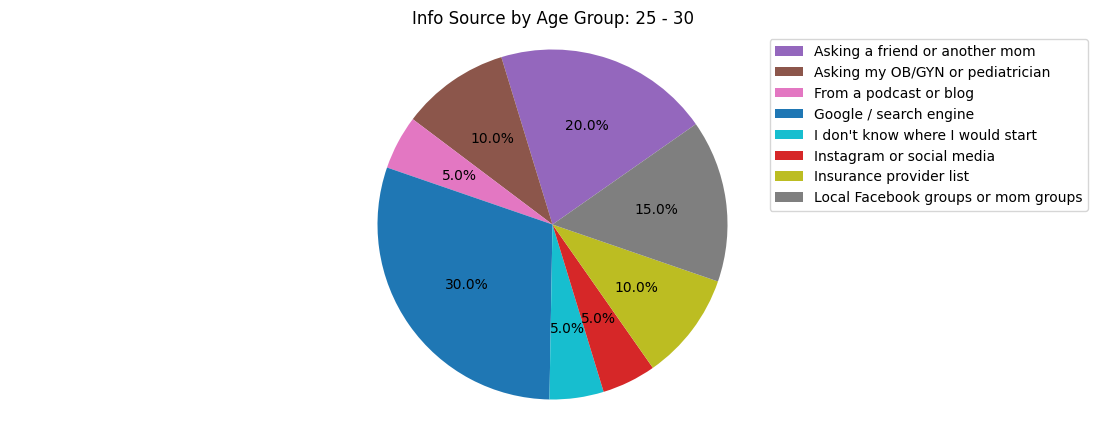

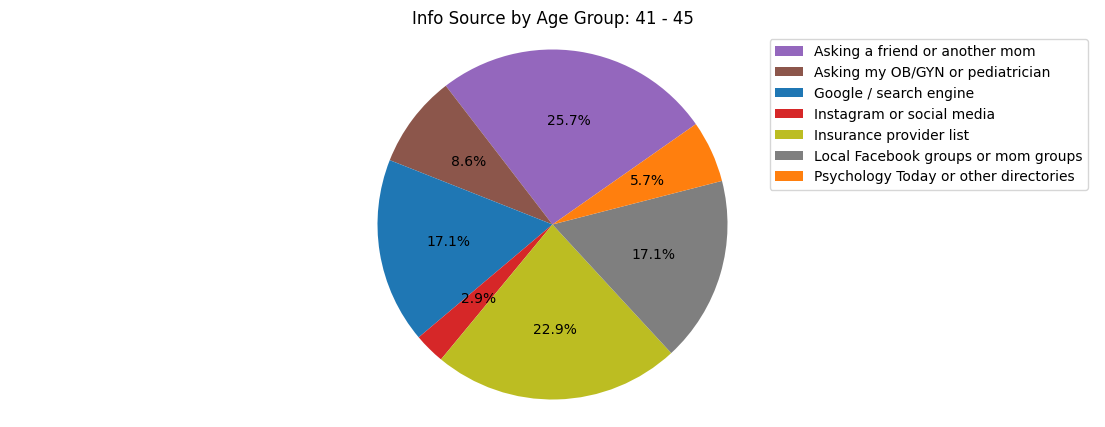

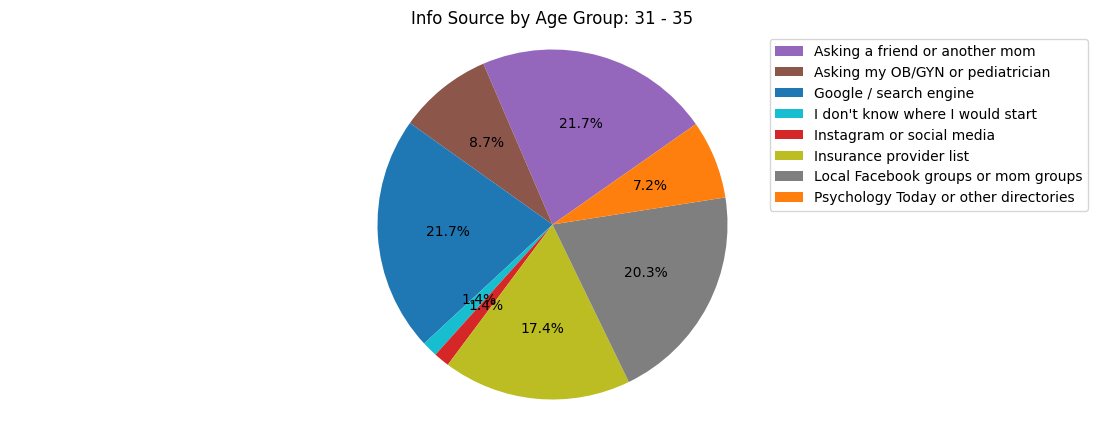

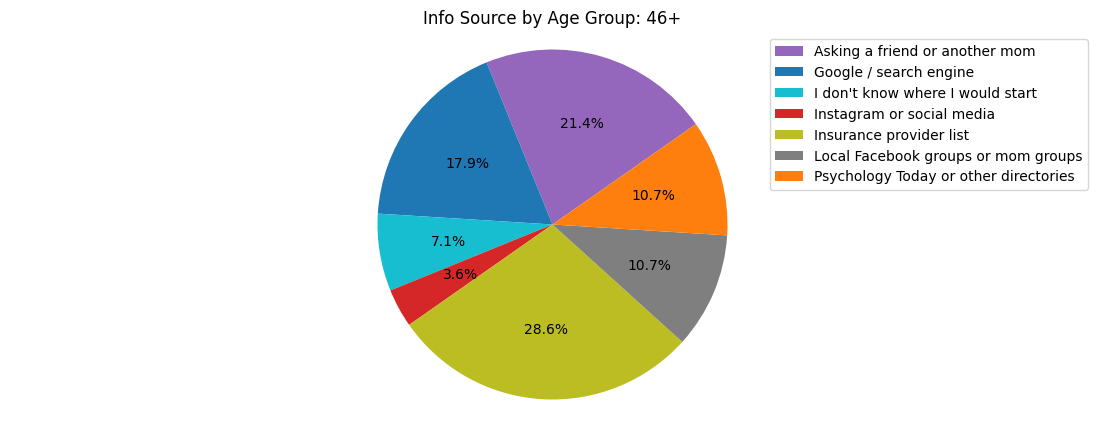

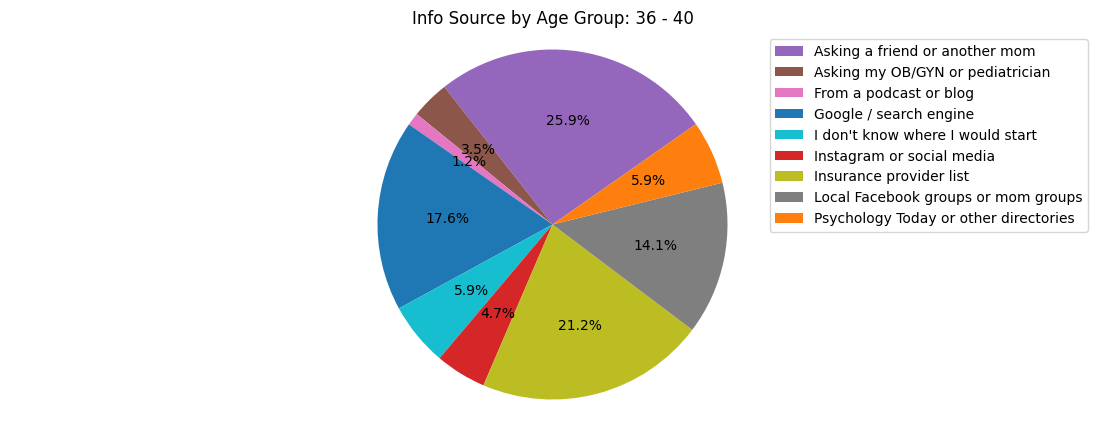

In [4]:
# print(mark_df2.head())
marketingdf2 = marketingdf2.rename(columns={1: 'Age Range', 
                                    '11_list': 'Social Media', 
                                    '12_list': 'Info Source'})

colordict_social = {'Podcasts': 'C1', 'Instagram': 'C3', 'Blogs or newsletters': 'C5', 'TikTok': 'C8', 'Google / search engines': 'C7'}

colordict_allcomms = {'Podcasts': 'C1', 'Therapy or support groups': 'C2', 
                        'Friends or other moms': 'C3', 'Instagram': 'C4',  
                        'Blogs or newsletters': 'C5', 'Books': 'C6', 'Google / search engines': 'C7', 
                         'TikTok': 'C8', 'My OB/GYN or pediatrician': 'C9'}
colordict_info =   {'Google / search engine': 'C0', 'Psychology Today or other directories': 'C1',
                        'Instagram or social media': 'C3', 'Asking a friend or another mom': 'C4', 
                        'Asking my OB/GYN or pediatrician': 'C5', 'From a podcast or blog': 'C6',
                        'Local Facebook groups or mom groups': 'C7', 'Insurance provider list': 'C8', 
                        'I don\'t know where I would start': 'C9'}
def AgeComparisonPieCharts(df, groupcol, datacol, colordict=None):
        age_comparedf = df[[groupcol, datacol]]
        age_comparedf = age_comparedf.explode(datacol)
        #print(age_socialmedia)

        age_comparedf = age_comparedf.groupby(groupcol).value_counts().reset_index().sort_values(by=datacol)
        #print(age_socialmedia)


        for group in age_comparedf['Age Range'].unique():
            ageset = age_comparedf[age_comparedf[groupcol] == group]
            if colordict:
                ageset = ageset[ageset[datacol].isin(colordict)]
            labels = ageset[datacol]
            sizes = ageset['count']
            plt.figure(figsize=[14, 5])
            plt.pie(sizes, autopct='%1.1f%%', 
                startangle=35, colors=[colordict[key] if colordict else None for key in labels])
            plt.title(f'{datacol} by Age Group: {group}')
            plt.legend(labels=labels)
            plt.axis('equal')
            plt.show()

# Create pie charts of Age Range / ALL COMMUNICATION PLATFORMS (beyond just social media)
AgeComparisonPieCharts(marketingdf2, 'Age Range', 'Social Media', colordict=colordict_allcomms)

# Create pie charts of Age Range / Social Media platforms used
AgeComparisonPieCharts(marketingdf2, 'Age Range', 'Social Media', colordict=colordict_social)

# Create pie charts of Age Range / Information sources 
AgeComparisonPieCharts(marketingdf2, 'Age Range', 'Info Source', colordict=colordict_info)



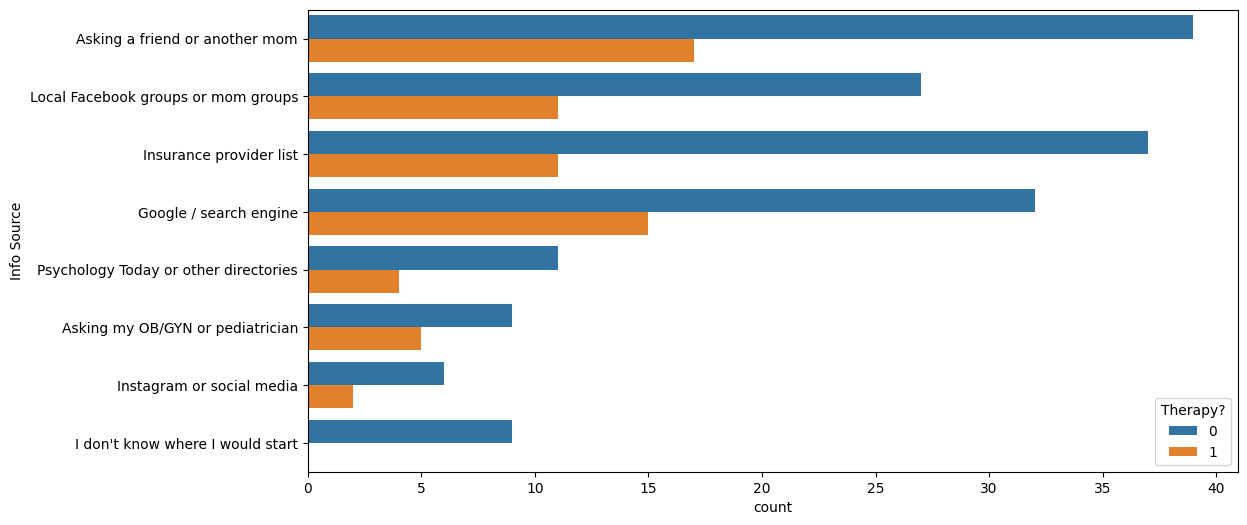

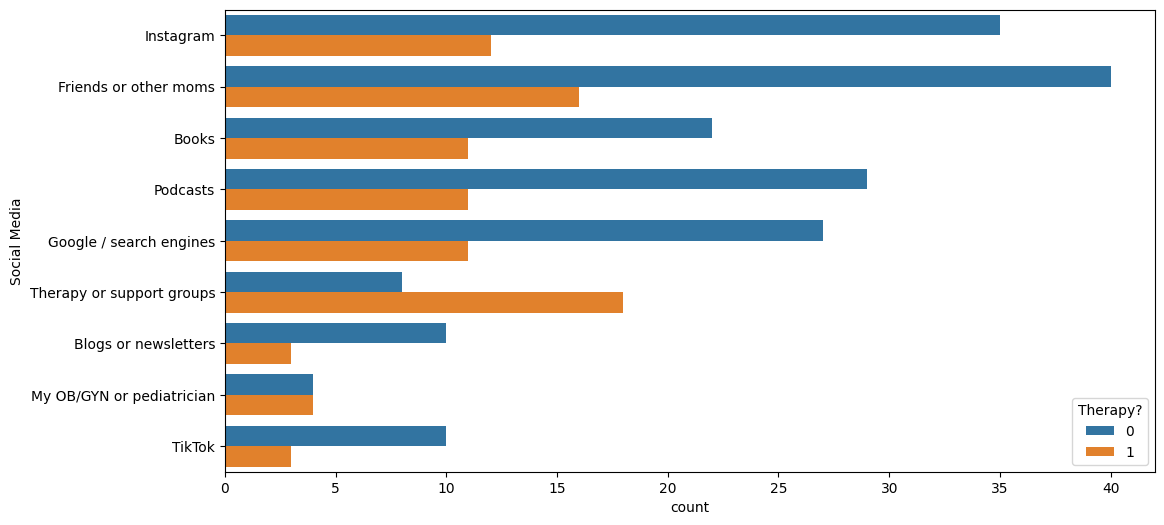

In [ ]:
social_bardf = marketingdf2[['Social Media', 'Info Source']].copy()

social_bardf['Therapy?'] = label

def explode_filter_plot(df, explodecol, labelcol):
    df = df.explode(explodecol)
    counts = df[explodecol].value_counts()
    counts = counts[counts>2]
    df = df[df[explodecol].isin(counts.index)]

    plt.figure(figsize=(12,6))
    sns.countplot(y=explodecol, hue=labelcol, data=df)
    plt.show()

explode_filter_plot(social_bardf, explodecol='Info Source', labelcol='Therapy?')
explode_filter_plot(social_bardf, explodecol='Social Media', labelcol='Therapy?')


**Analysis of Mom Age and Number of Children**

We also decided to take a look at age ranges of children and mothers as well as the number of kids a mother has and see if there were certain categories that stood out as choosing therapy more often. We can see below that mothers who have a single child as well as mothers. Overwhelmingly, mothers who have only one child go to therapy at a higher rate than their counterparts. This can be seen below, when we group by mom's age and number of children, the three groups with the largest proportion of mothers in therapy are all single child groups. These three groups also then descend based on mom age range, with the lowest age range at top.

Therapy?                                             Yes
Number Kids: [1], Kid Age: [4-12 months postpar...  56.0
Number Kids: [1], Kid Age: [Toddler years (1-3 ...  43.0
Number Kids: [1], Kid Age: [Pregnant]               33.0
Number Kids: [2], Kid Age: [School-age children]    26.0
Number Kids: [2], Kid Age: [Pregnant]               25.0
Number Kids: [2], Kid Age: [Newborn phase (0-3 ...  25.0
Number Kids: [2], Kid Age: [Toddler years (1-3 ...  23.0
Number Kids: [1], Kid Age: [School-age children]    22.0
Number Kids: [2], Kid Age: [4-12 months postpar...  20.0
Number Kids: [3], Kid Age: [School-age children]    12.0
Number Kids: [3], Kid Age: [Toddler years (1-3 ...  12.0


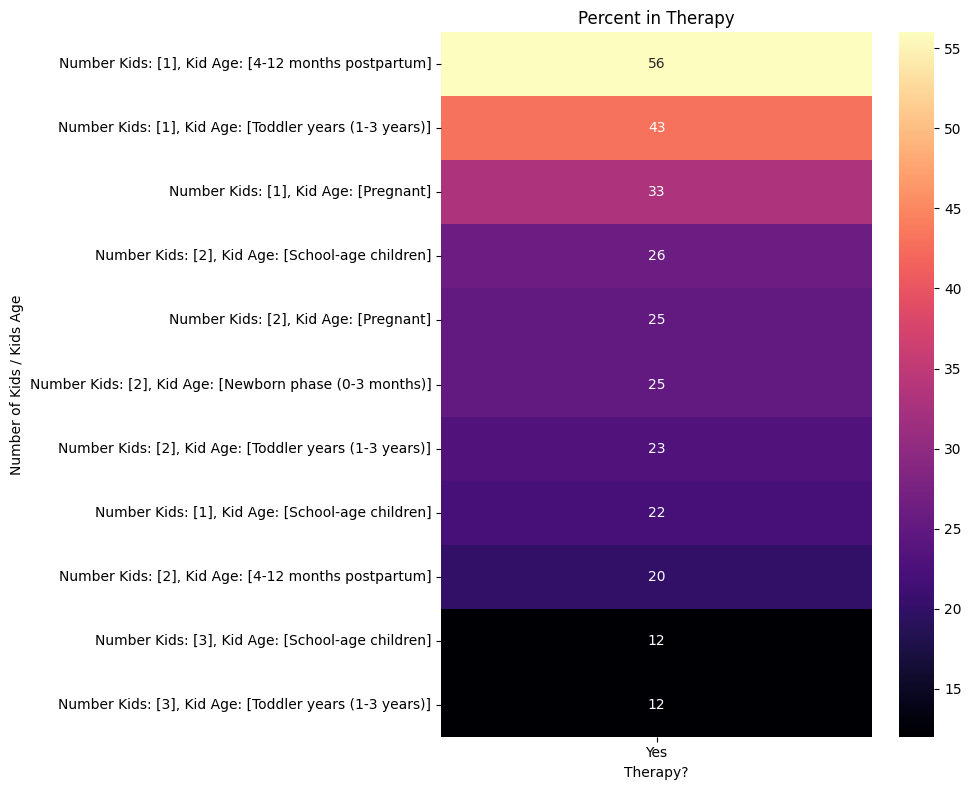

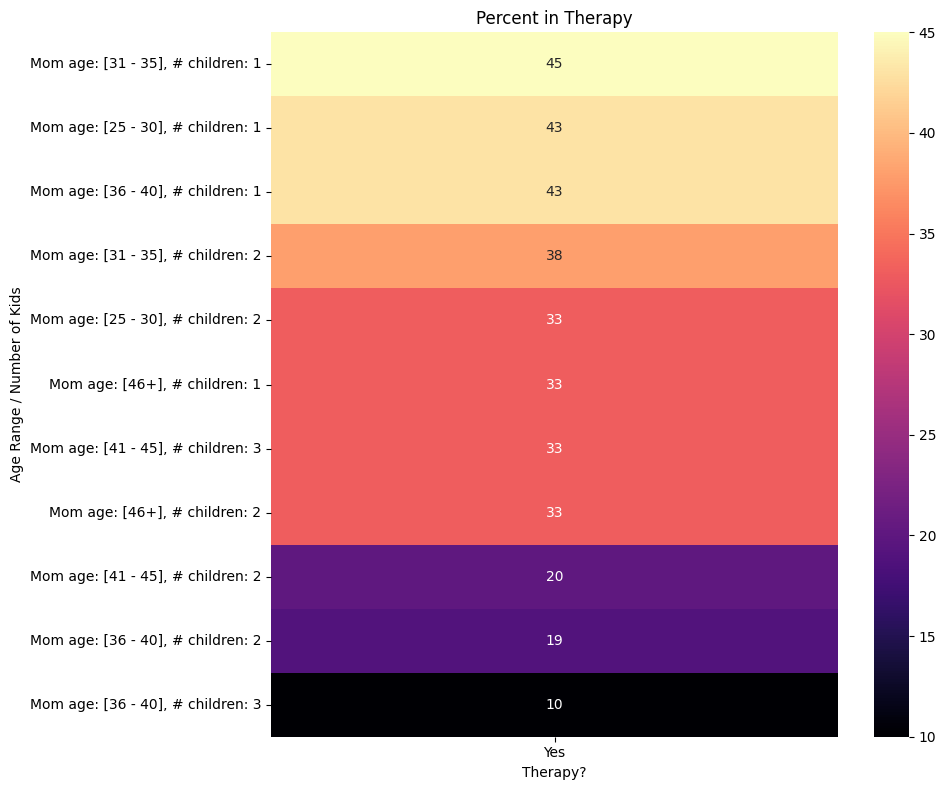

In [ ]:

newdf = marketingdf2[['Age Range', 3, '2_list', '4_list']].copy()
newdf['Therapy?'] = marketingdf['5_list_I\'m already in therapy']
newdf.rename(columns={3:"Number Kids", '2_list': 'Kids Age'}, inplace=True)
newdf.sort_values(by=['Number Kids', 'Age Range'], ascending=[True, True], inplace=True)
# print(newdf.head())


therapydict = {0: 'No', 1: 'Yes'}
newdfgroup1 = newdf.groupby(['Age Range', 'Number Kids'])['Therapy?'].value_counts(normalize=True).round(2)*100
newdfgroup1 = newdfgroup1.to_frame()
newdfgroup1 = newdfgroup1.astype('int')
newdfgroup1.index = newdfgroup1.index.set_levels(newdfgroup1.index.levels[2].map(therapydict), level=2)

newdf = newdf.explode('Kids Age')
newdfgroup2 = newdf.groupby(['Number Kids', 'Kids Age'])['Therapy?'].value_counts(normalize=True).round(2)*100
newdfgroup2 = newdfgroup2.to_frame()
newdfgroup2 = newdfgroup2.astype('int')
newdfgroup2.index = newdfgroup2.index.set_levels(newdfgroup2.index.levels[2].map(therapydict), level=2)
newdfgroup2 = newdfgroup2.reset_index()
newdfgroup2 = newdfgroup2[newdfgroup2['Therapy?']=='Yes']
newdfgroup2 = newdfgroup2.pivot_table(index=['Number Kids', 'Kids Age'], columns='Therapy?', values='proportion')
newdfgroup2.index = [f"Number Kids: [{numkids}], Kid Age: [{kidage}]" for numkids, kidage in newdfgroup2.index] 
newdfgroup2 = newdfgroup2.sort_values(by='Yes', ascending=False)
# print(newdfgroup2)
plt.figure(figsize=(10, 8))
sns.heatmap(newdfgroup2, annot=True, cmap='magma', fmt=".0f")
plt.title("Percent in Therapy")
plt.ylabel("Number of Kids / Kids Age")
plt.xlabel("Therapy?")
plt.tight_layout()
plt.show()

df_flat = newdfgroup1.reset_index()  
df_flat.columns = ['Age Range', 'Number Kids', 'Therapy?', 'Proportion']
df_flat = df_flat[df_flat['Therapy?']=='Yes']
# print(df_flat)
heatmap_df1 = df_flat.pivot_table(
    index=['Age Range', 'Number Kids'],
    columns='Therapy?',
    values='Proportion'
)

# print(heatmap_df1)

heatmap_df1.index = [f"Mom age: [{age}], # children: {kids}" for age, kids in heatmap_df1.index]
heatmap_df1 = heatmap_df1.sort_values(by='Yes', ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df1, annot=True, cmap='magma', fmt=".0f")
plt.title("Percent in Therapy")
plt.ylabel("Age Range / Number of Kids")
plt.xlabel("Therapy?")
plt.tight_layout()
plt.show()


**Curse of Dimensionality (part 1) Dropping Columns with Little Activity**

After assigning each multiresponse question choice a binary response column, the dimensions of the dataset immensely (to over 200 individual columns). With less than 100 responses to the survey, this was a problem. Each multiresponse question included an open-ended choice that was optional, so the first thing to do was to eliminate columns corresponding to these open ended answers. This was not enough to cure the curse of dimensionality that we faced. We then dropped columns corresponding to responses that had less than 10 selections.  

In [ ]:


def LowCountDropper(df, limit=25, labelcol=' '):
    numcols = df.columns[df.dtypes == 'int64']
    colsums = np.sum(df[numcols], axis=0)
    dropcols = colsums[(colsums <= limit) & (colsums.index != labelcol)].index.tolist()
    return marketingdf.drop(columns=dropcols), colsums

df_filt, colsums = LowCountDropper(marketingdf, limit=10, labelcol='5_list_I\'m already in therapy')

# First label column - (people who have started therapy = 1, not in therapy = 0)
#print(df_filt['5_list_I\'m already in therapy'].sum())
# print(df_filt.shape)

# print(df_filt)
df_filt.to_csv('filtered_marketingdf.csv')


**Curse of Dimensionality (part 2) Multiple Corresponence Analysis - Dimensionality Reduction**

Another process used to reduce dimensionality in the dataset is a process call multiple correspondence analysis. This process uses each individual question selection for each survey response to form a lower dimension representation of each survey response. We can then see if there are any patterns in the underlying, lower-dimension pattern. 

In the first plot below, we can see some grouping of similar points (yellow) in the top right corner section of the plot. We can also see that those yellow points are "pulled" that direction by the lowest age range arrow, reinforcing the plot above that shows the youngest age ranges of moms as in therapy at a higher rate (in addition to the single child aspect). In the third plot, the one loading that "pulls" the points that direction is the single child arrow. This also reinforces previous analysis.

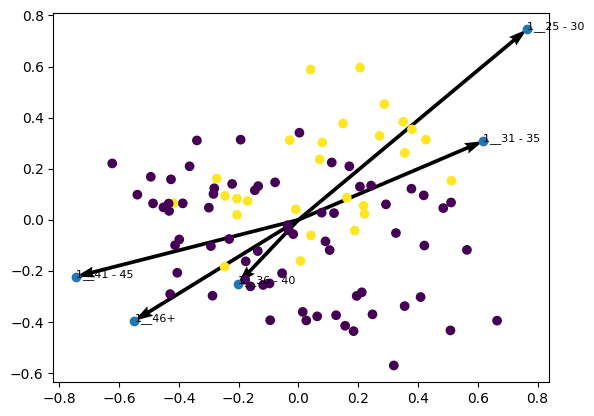

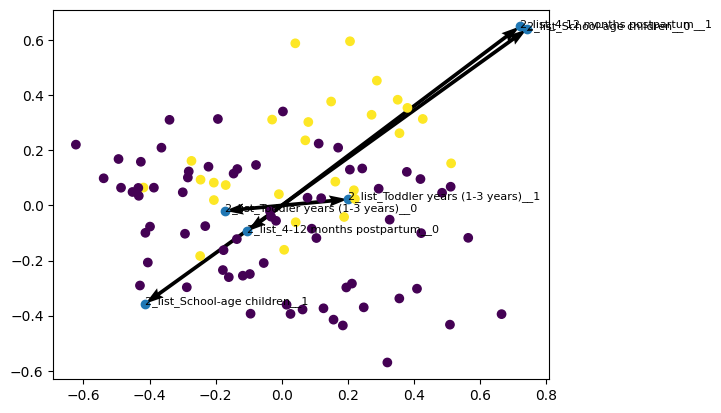

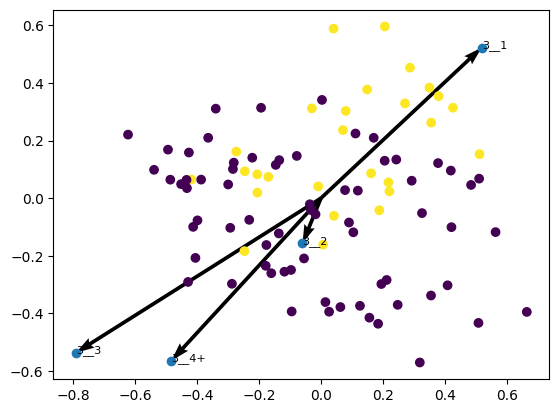

In [ ]:
def MCAandPlot(df, start, stop, targetcol, n_comps, comp1, comp2):    
    mca = MCA(n_components=n_comps)
    mca = mca.fit(df)
    # print(mca.eigenvalues_summary)
    #print(mca.column_coordinates(df_filt))

    loadings = mca.column_coordinates(df)

    #print(loadings.head())
    target = df[targetcol]
    df = df.drop(columns=targetcol)
    #print(loadings.head(25))
    for i in range(start, stop):
        label = loadings.index[i]
        plt.text(loadings.iloc[i, comp1], loadings.iloc[i, comp2], label, fontsize=8)


    plt.quiver(np.zeros(stop - start), np.zeros(stop - start), loadings.iloc[start:stop, comp1], 
               loadings.iloc[start:stop, comp2], scale=1, scale_units='xy', angles='xy')
    plt.scatter(loadings.iloc[start:stop, comp1], loadings.iloc[start:stop, comp2])
    plt.scatter(mca.row_coordinates(df)[comp1], mca.row_coordinates(df)[comp2], c=target)

    plt.show()


# Mom age range loadings, first 2 components
MCAandPlot(df_filt, 0, 5, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=0, comp2=1)

# Child age loadings, first 2 components
MCAandPlot(df_filt, 9, 15, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=0, comp2=1)

# # Mom age range loadings, second 2 components
# MCAandPlot(df_filt, 0, 5, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=2, comp2=3)

# # Child age loadings, second 2 components
# MCAandPlot(df_filt, 9, 15, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=2, comp2=3)

# # Mom age range loadings, third 2 components
# MCAandPlot(df_filt, 0, 5, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=4, comp2=5)

# # Child age loadings, third 2 components
# MCAandPlot(df_filt, 9, 15, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=4, comp2=5)

MCAandPlot(df_filt, 5, 9, targetcol='5_list_I\'m already in therapy', n_comps=6, comp1=0, comp2=1)

**Feeling Word Analysis**

Moms were also asked one word that described how they felt. The top consistent responses were "overwhelmed" and "tired".

In [ ]:
keyworddf.rename(columns={1: 'AgeRange', 2: 'KidsAge', 3: 'NumKids', 8: 'FeelingWord'}, inplace=True)
#print(keyworddf.head())

# Clean word column (remove extra characters, make all lowercase, use first word if sentence)
keyworddf['FeelingWord'] = keyworddf['FeelingWord'].str.split().str[0].str.strip(' .,!-').str.lower()

# Keyword counts grouped by mom age range
ageWords = keyworddf[['AgeRange', 'FeelingWord']].groupby('AgeRange').value_counts()
# print(ageWords.reset_index().sort_values(by='count', ascending=False).head(55))
# print(keyworddf)

# Keyword counts grouped by number of kids
kidAgeWords = keyworddf[['NumKids', 'FeelingWord']].groupby('NumKids').value_counts()
kidAgeWords = kidAgeWords.reset_index().sort_values(by='count', ascending=False).head(55)
print(kidAgeWords.head())


   NumKids  FeelingWord  count
25       2  overwhelmed      8
26       2        tired      5
53       3  overwhelmed      5
54       3        tired      4
0        1        tired      4


**Emotional Feeling Needs Analysis**

Here we aimed to answer the given question "Which groups (by age, stage, or emotional need) are most drawn to features like therapist who’s also a mom, flexible scheduling, or virtual sessions?". Based on common responses to certain feeling questions, it was important to analyze for moms reporting, for example, anxiety or overwhelm which offerings from a practice are important. We found that moms reporting anxiety or racing thoughts prefer a therapist who is also a mom and moms reporting overwhelm or burnout prefer both virtual sessions and flexible scheduling (evenings / weekends).

,Feeling,Response,Virtual Sessions,Mom Therapist,Flexible Scheduling
0,Overwhelm or Burnout,No,0.391304,0.652174,0.565217
1,Overwhelm or Burnout,Yes,0.583333,0.555556,0.694444
2,Anxiety or Racing Thoughts,No,0.520000,0.460000,0.660000
3,Anxiety or Racing Thoughts,Yes,0.555556,0.711111,0.666667


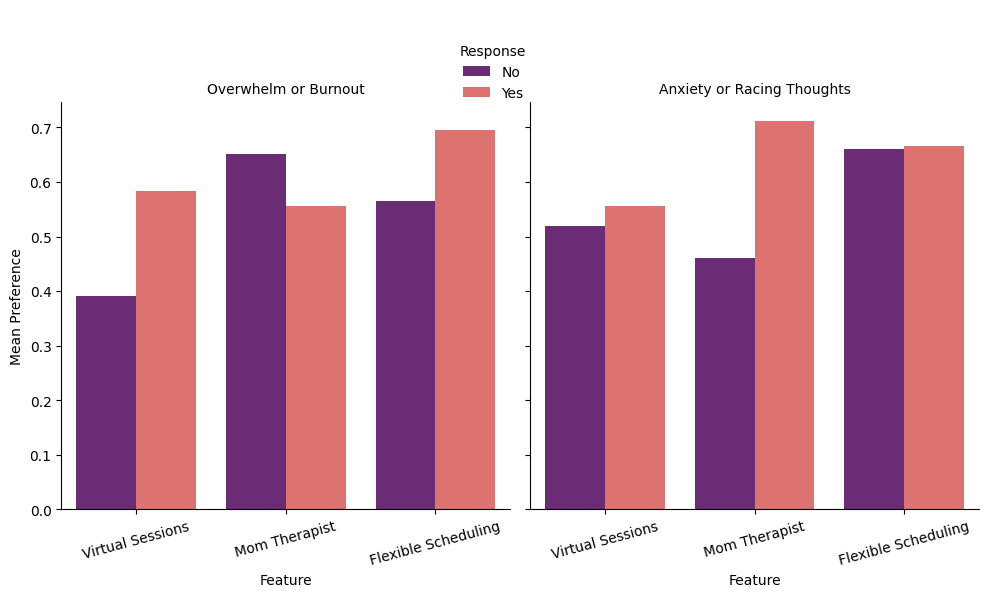

In [ ]:
df_filt.columns = df_filt.columns.astype('str')
cols = df_filt.columns[df_filt.columns.str.startswith(('4_list', '5_list', '6_list'))]
df456 = df_filt[cols]

# print(df456.head())

df456.to_csv('df456.csv', index=False)

overwhelmdf = df456.groupby('4_list_Overwhelm or burnout')[['6_list_Virtual sessions']].mean().rename(columns={'6_list_Virtual sessions': 'Virtual Sessions'})

overwhelmdf['Mom Therapist'] = df456.groupby('4_list_Overwhelm or burnout')['6_list_A therapist who\'s also a mom'].mean()

overwhelmdf['Flexible Scheduling'] = df456.groupby('4_list_Overwhelm or burnout')['6_list_Flexible scheduling (evenings/lunchtimes/weekends)'].mean()

anxietydf = df456.groupby('4_list_Anxiety or racing thoughts')[['6_list_Virtual sessions']].mean().rename(columns={'6_list_Virtual sessions': 'Virtual Sessions'})

anxietydf['Flexible Scheduling'] = df456.groupby('4_list_Anxiety or racing thoughts')['6_list_Flexible scheduling (evenings/lunchtimes/weekends)'].mean()

anxietydf['Mom Therapist'] = df456.groupby('4_list_Anxiety or racing thoughts')['6_list_A therapist who\'s also a mom'].mean()

df = pd.concat([overwhelmdf, anxietydf], keys=['Overwhelm or Burnout', 'Anxiety or Racing Thoughts'])

df = df.reset_index().rename(columns={'4_list_Overwhelm or burnout': 'Response', 'level_0': 'Feeling'})

df['Response'] = df['Response'].replace({0: 'No', 1: 'Yes'})
display(df)

df_melted = df.melt(id_vars=['Feeling', 'Response'], value_vars=['Virtual Sessions', 'Mom Therapist', 'Flexible Scheduling'],
                    var_name='Feature', value_name='Mean')

# display(df_melted)

g = sns.catplot(data=df_melted, x='Feature', y='Mean', hue='Response', col='Feeling', kind='bar', height=5, aspect=1, palette='magma')
g.set_xticklabels(rotation=15)
g.set_titles("{col_name}")
g.set_axis_labels("Feature", "Mean Preference")
g._legend.set_title("Response")
g._legend.set_bbox_to_anchor((0.5, 1.05)) 
plt.show()

Who are my core segments?

•	How do these segments differ in their emotional struggles or needs?
What emotional needs align with which service barriers?

•	Among those reporting burnout, anxiety, or guilt, what are the most common barriers keeping them from therapy (e.g., cost, time, lack of trust)?

Which therapy features are most attractive to which groups?

•	Which groups (by age, stage, or emotional need) are most drawn to features like “therapist who’s also a mom,” “flexible scheduling,” or “virtual sessions”?


What website or social proof elements matter most for conversion?

•	For those saying they’d reach out to a therapist, which website elements (credentials, photos, ease of booking, testimonials) matter most?

•	Are certain emotional struggles (e.g., guilt, burnout) more sensitive to seeing a therapist’s personal style (like “also a mom”) on the website or social media?

What marketing strategies can address key barriers?

•	For those citing cost or time as a barrier, would emphasizing flexible options (evening sessions, virtual) increase engagement?

Where should we focus outreach efforts?


Done...

•	Which discovery channels (Instagram, Google, referrals, OB/GYN) are most used by those actively seeking therapy?

•	Can you identify distinct customer segments (e.g., younger first-time moms vs. older moms with multiple kids) based on age, motherhood stage, and number of children?

 How do preferred marketing channels differ across groups? (pie chart, age groups – social media platorm)

 •	Do younger moms prefer learning from TikTok or Instagram, while older moms rely more on Google or podcasts?


